In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the data and set date as index
df = pd.read_csv(r"C:\Users\MayankKoundal\Documents\Datasets\Moodys.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

In [3]:

# Check for missing values
print(df.isna().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# Add day of week column
df['day'] = df.index.day_name()

In [5]:
# Calculate date range
date_range = df.index.max() - df.index.min()

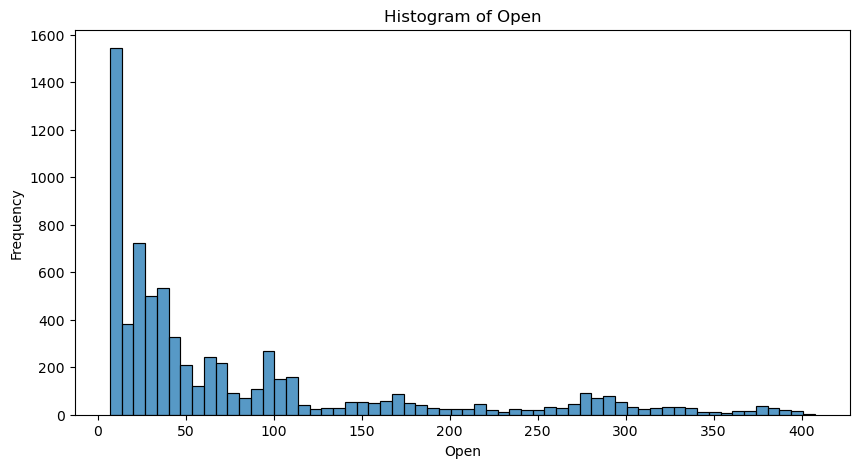

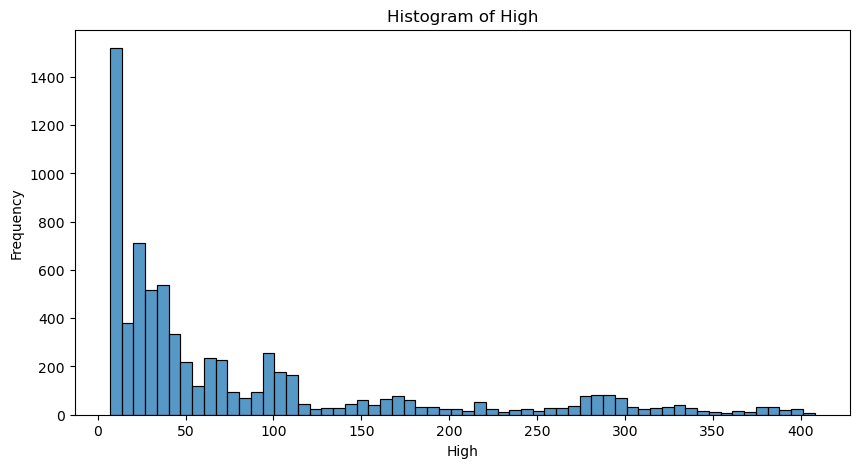

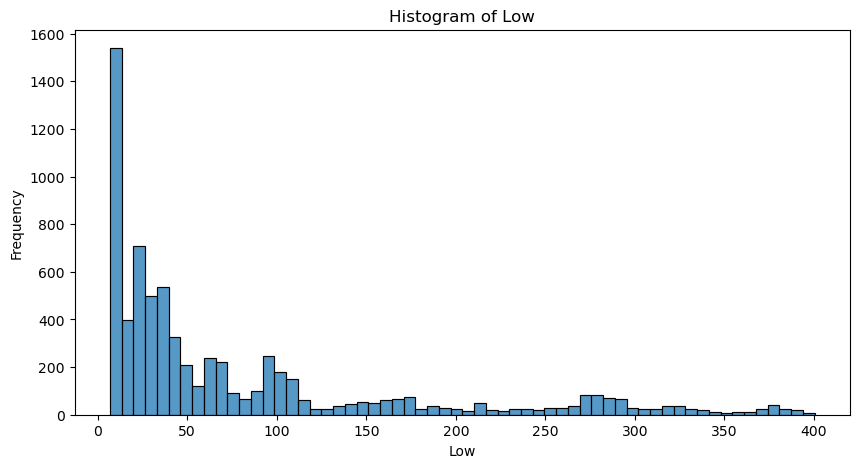

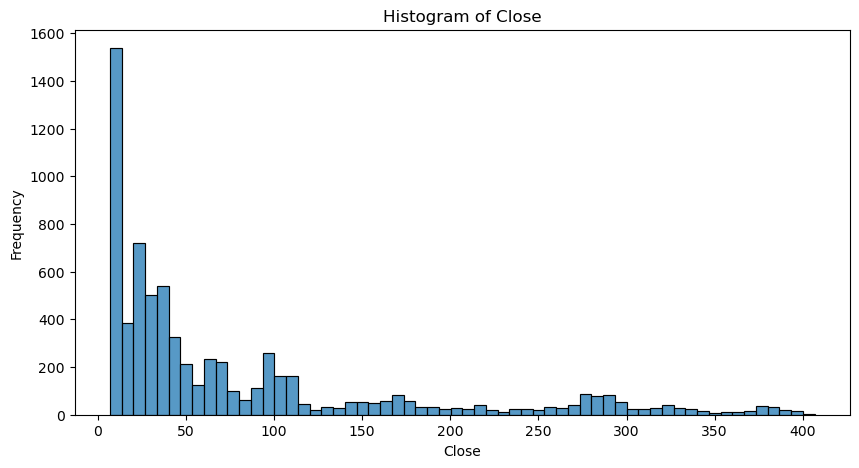

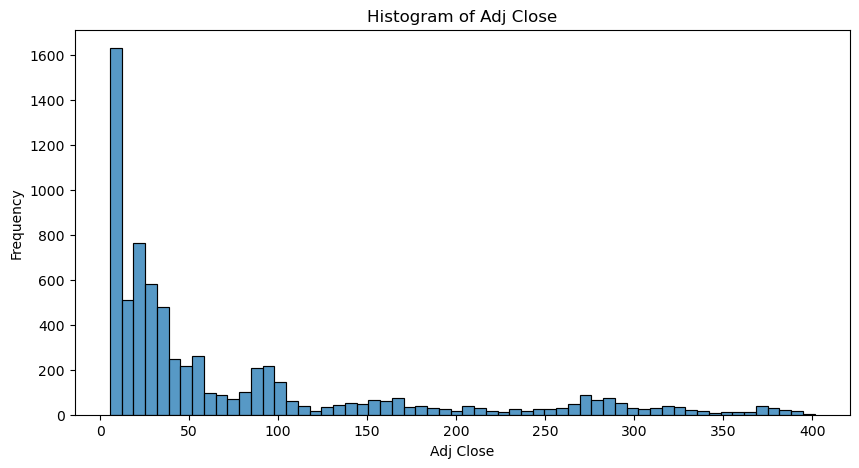

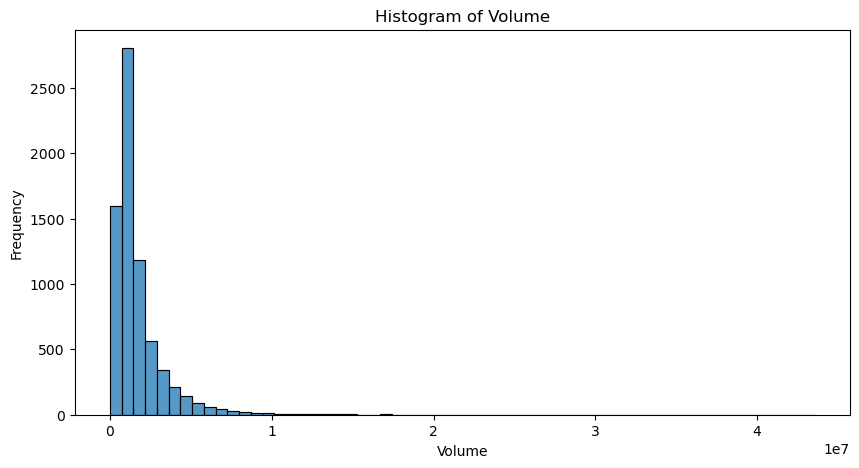

In [7]:
# Plot histograms for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, bins=60)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



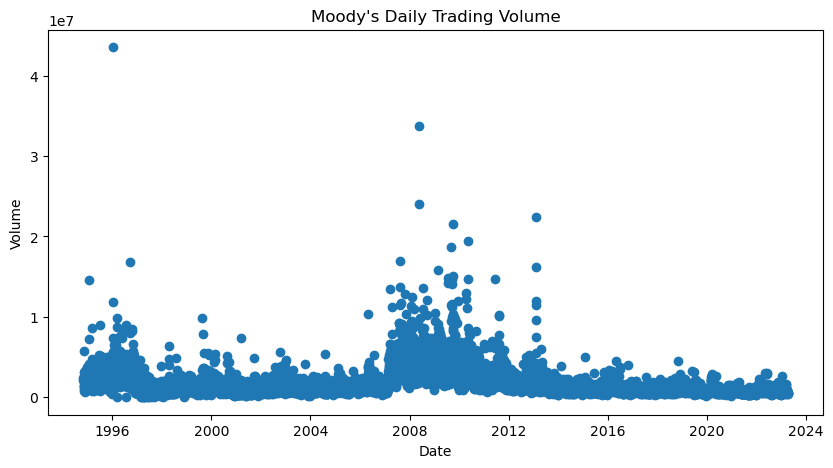

In [8]:
# Plot trading volume over time
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Volume'])
plt.title("Moody's Daily Trading Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


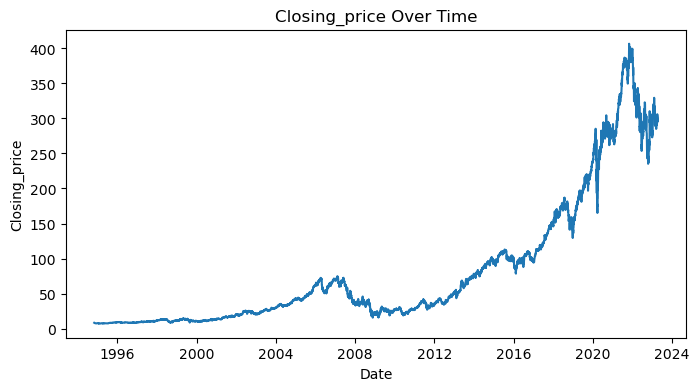

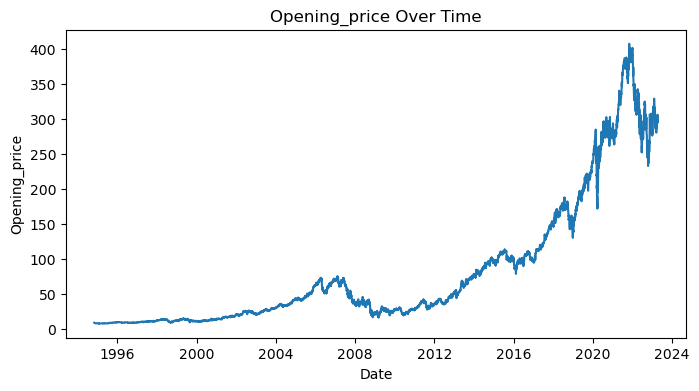

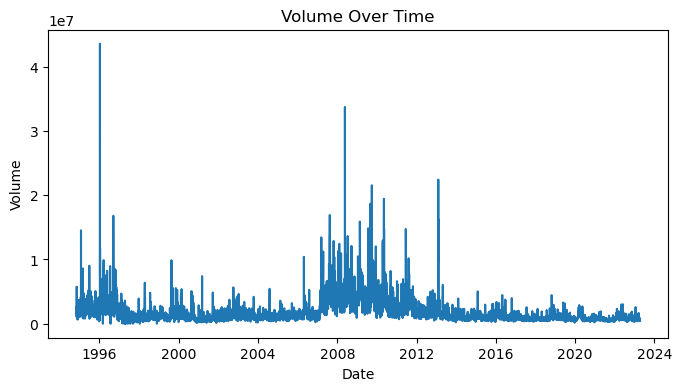

In [9]:
# Plot closing, opening price and trading volume over time
for col, label in zip(['Close', 'Open', 'Volume'], ['Closing_price', 'Opening_price', 'Volume']):
    plt.figure(figsize=(8, 4))
    plt.title(f'{label} Over Time')
    plt.plot(df[col])
    plt.xlabel('Date')
    plt.ylabel(label)
    plt.show()

C:\Users\MayankKoundal\AppData\Local\Temp\ipykernel_17116\3192094390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


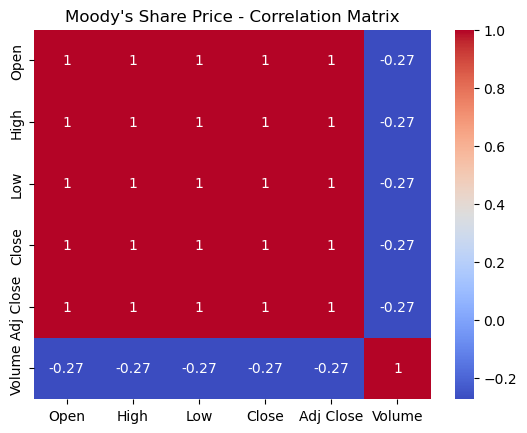

In [10]:
# Plot correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Moody's Share Price - Correlation Matrix")
plt.show()

In [11]:
# Calculate daily return
df['Daily_Return'] = df['Close'].pct_change()

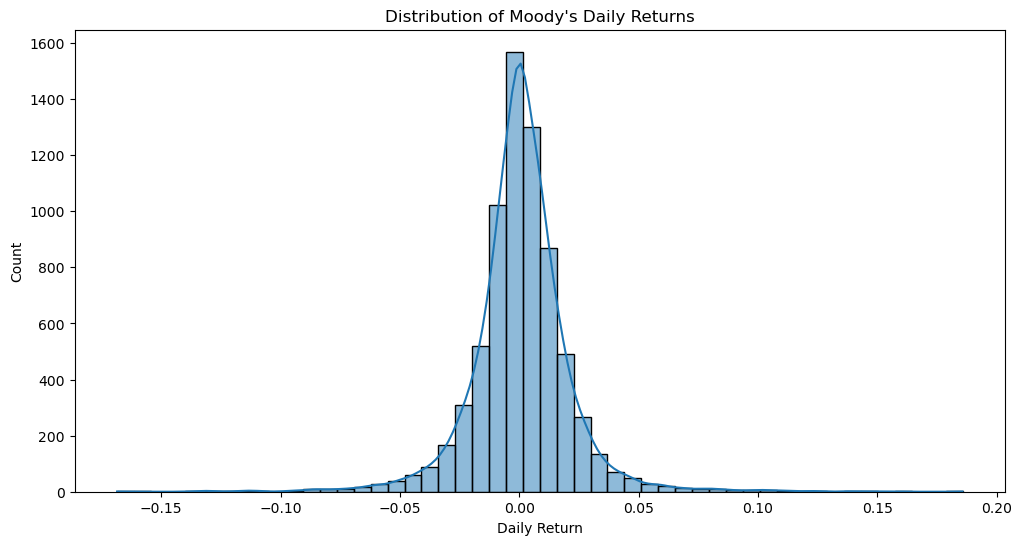

In [12]:
# Plot distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=50)
plt.title("Distribution of Moody's Daily Returns")
plt.xlabel('Daily Return')
plt.show()


In [13]:
# Calculate moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

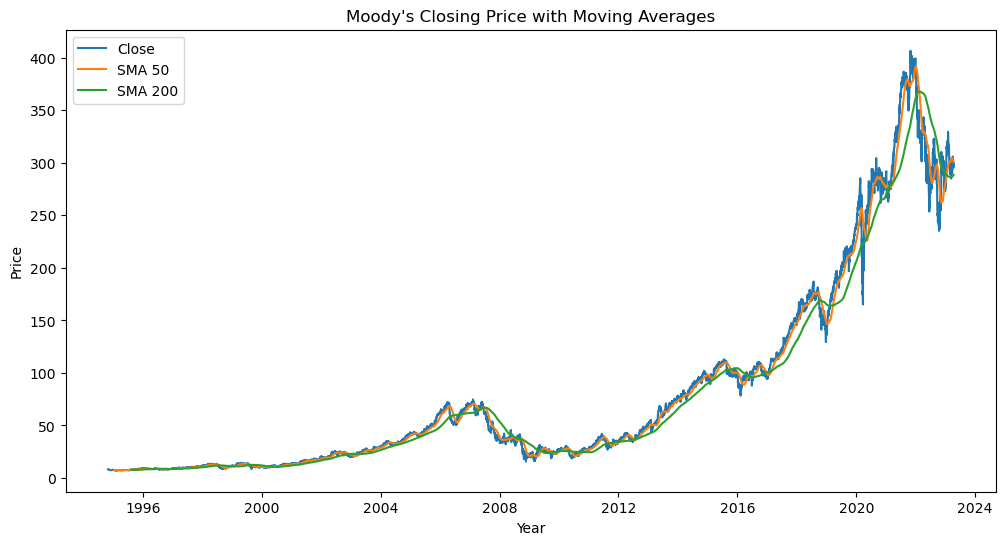

In [14]:
# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_50'], label='SMA 50')
plt.plot(df['SMA_200'], label='SMA 200')
plt.title("Moody's Closing Price with Moving Averages")
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

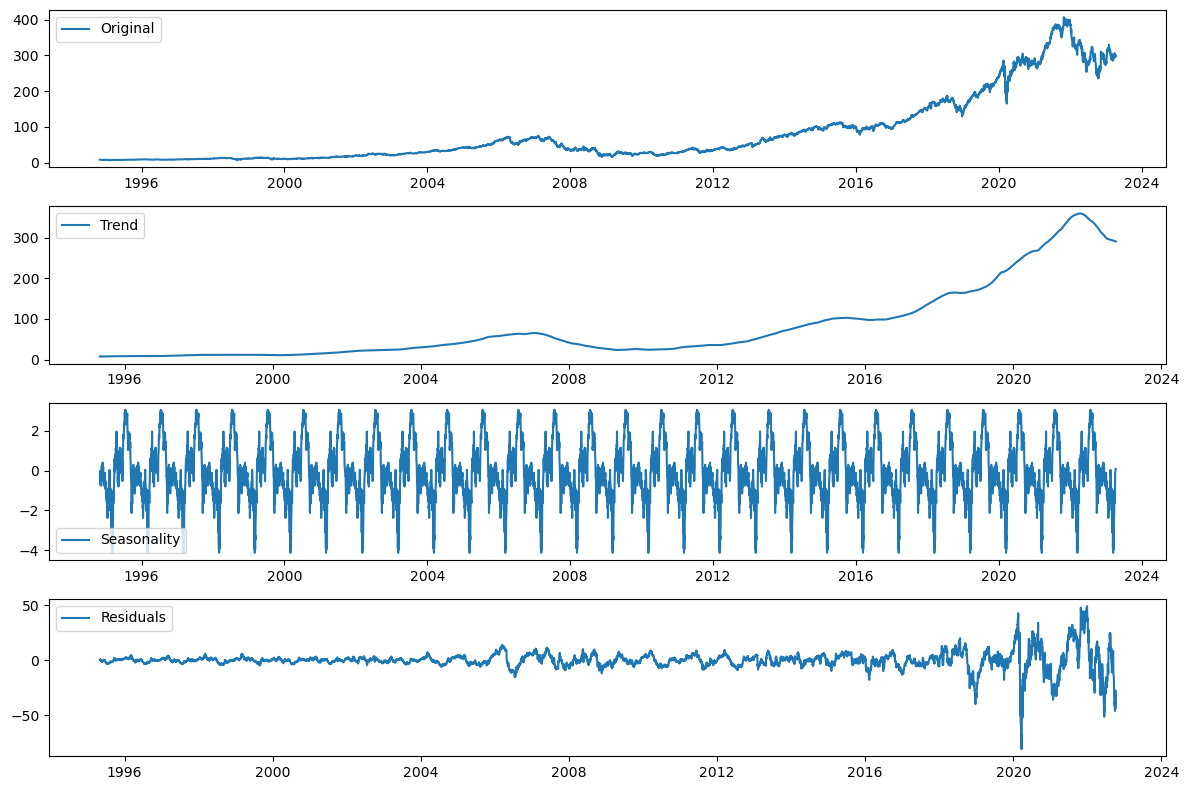

In [16]:
# Plot seasonal decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()